## New York City Taxi Fare Prediction

This is the open data set available in Kaggle. The data set is pretty large but we will not be utilizing all the records. We will be importing only 1 million records and will work on this small chunk.

Here our task is predicting the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations. While we can get a basic estimate based on just the distance between the two points, this will result in an RMSE of $5-$8, depending on the model used. Our challenge is to do better than this using Machine Learning techniques!

Data's link here: 
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np 
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

import os
print(os.listdir("C:/Sandeep/Data Science Data Sets/Kaggle/New York City Taxi Fare Prediction"))
# Any results you write to the current directory are saved as output.

['GCP-Coupons-Instructions.rtf', 'sample_submission.csv', 'test.csv', 'train.csv']


In [2]:
#laod the training and test data

train = pd.read_csv("C:/Sandeep/Data Science Data Sets/Kaggle/New York City Taxi Fare Prediction/train.csv", nrows = 1000000 )
test = pd.read_csv("C:/Sandeep/Data Science Data Sets/Kaggle/New York City Taxi Fare Prediction/test.csv")

### DATA CLEANSING & EXPLORATORY DATA ANALYSIS (EDA)

#### Will perform the following activities

- Shape of train and test sets
- Check for NaNs and drop them (if any)
- Check for outliers and drop them (if any)
- Type conversion of relevant fields

In [3]:
print("Training data shapre {}".format(train.shape))
print("Testing data shapre {}".format(test.shape))

Training data shapre (1000000, 8)
Testing data shapre (9914, 7)


In [4]:
train.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [5]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [6]:
#check for the missing values for the dataset
train.isnull().sum().sort_values(ascending = False)

dropoff_latitude     10
dropoff_longitude    10
passenger_count       0
pickup_latitude       0
pickup_longitude      0
pickup_datetime       0
fare_amount           0
key                   0
dtype: int64

In [7]:
test.isnull().sum().sort_values(ascending = False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
key                  0
dtype: int64

In [8]:
#since the training set has huge volumes of data we can drop null rows
#drop the missing values from the dataset

train = train.drop(train[train.isnull().any(1)].index, axis = 0)

In [9]:
train.shape

(999990, 8)

## Target Column Analysis

### Fare_amount

- Above output shows there are some rows which has fare amount in negative. In Real time these cases are not possible hence we are going to drop the rows with negative fare amount.

- Lets first count the number of records with negative Fare amount. It shows we have 38 rows with negative amount.
- Drop the rows with negative fare amount.
- Describe the fare amount again to check if there is still negative amount left.

In [10]:
#describe the Target column
train['fare_amount'].describe()

count    999990.000000
mean         11.347953
std           9.821790
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [11]:
#count the number of negative records
from collections import Counter
Counter(train['fare_amount'] < 0)

Counter({False: 999952, True: 38})

In [12]:
#drop negative amount records
train = train.drop(train[train['fare_amount'] < 0].index, axis = 0)

#print the shape of the trainin dataset
train.shape

(999952, 8)

In [13]:
#check if there is still negative records present in fare amount
train['fare_amount'].describe()

count    999952.000000
mean         11.348616
std           9.821249
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [14]:
train['fare_amount'].sort_values(ascending = False)

101885    500.00
247671    495.00
287638    450.00
233874    450.00
329010    450.00
361793    400.00
451974    400.00
951810    347.54
578919    287.08
130460    281.05
309769    263.25
719764    262.04
142550    255.00
888472    250.25
351584    250.00
217225    245.41
786490    243.00
149769    240.00
168218    235.00
202499    225.00
612128    220.00
806692    220.00
196990    217.00
784935    215.00
416989    215.00
225249    215.00
285659    214.33
110337    212.00
215662    211.44
979151    210.00
           ...  
671873      0.01
895361      0.00
762802      0.00
331597      0.00
266485      0.00
520715      0.00
670254      0.00
489767      0.00
938020      0.00
27891       0.00
897211      0.00
788466      0.00
957590      0.00
930680      0.00
386734      0.00
47302       0.00
760662      0.00
942215      0.00
431819      0.00
949564      0.00
436658      0.00
175352      0.00
10002       0.00
561786      0.00
681342      0.00
689250      0.00
211455      0.00
211499      0.

## Features Analysis

### passenger_count

- We can see the max value of passenger count is 208. A taxi cannot accomodate 208 passengers in a taxi so we need to take care of this record.
- Lets count the number the records for passenger count higher than 6.
- We can see only one record has passenger count higher than 6 which definitly be an outlier.
- Remove this record from the training dataset.
- After removing the outlier record we can see the data looks more neatter than before. Now the maximum number of passenger is 6 which is obviously the case with SUVs. 

In [15]:
train['passenger_count'].describe()

count    999952.000000
mean          1.684942
std           1.323908
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [16]:
train[train['passenger_count'] > 6].count()

key                  1
fare_amount          1
pickup_datetime      1
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    1
dropoff_latitude     1
passenger_count      1
dtype: int64

In [17]:
#droppin the outlier record
train.drop(train[train['passenger_count'] == 208].index, axis = 0,inplace = True)

In [18]:
train['passenger_count'].describe()

count    999951.000000
mean          1.684736
std           1.307733
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

### pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude

- Latitude ranges from -90 to 90 and longitude ranges from -180 to 180.
- Let's examine all the attributes one by one.

In [19]:
#describe the pickup latitude
train['pickup_latitude'].describe()

count    999951.000000
mean         39.929090
std           7.626025
min       -3116.285383
25%          40.734965
50%          40.752695
75%          40.767154
max        2621.628430
Name: pickup_latitude, dtype: float64

In [20]:
#count the number of records which has latitude < -90
len(train[train['pickup_latitude'] < -90 ])

3

In [21]:
# we can see only 3 records has latitude less than 90.
#drop these records from the training set.
train.drop(train[train['pickup_latitude'] < -90].index, axis = 0, inplace = True)

In [22]:
train.shape

(999948, 8)

In [23]:
#count the number of records which has latitude > 90
len(train[train['pickup_latitude'] > 90 ])

9

In [24]:
# we can see only 3 records has latitude more than 90.
#drop these records from the training set.
train.drop(train[train['pickup_latitude'] > 90].index, axis = 0, inplace = True)

In [25]:
train.shape

(999939, 8)

In [26]:
#describe the pickup longitude
train['pickup_longitude'].describe()

count    999939.000000
mean        -72.525443
std          10.692752
min       -1452.988333
25%         -73.992060
50%         -73.981792
75%         -73.967095
max          40.850357
Name: pickup_longitude, dtype: float64

In [27]:
#there are some records with unrealistic longitude. lets find out and drop those records.
#count the records which has longitue less than -180.
len(train[train['pickup_longitude'] < -180])

11

In [28]:
#drop the records with longitude less than -180
train.drop(train[train['pickup_longitude'] < -180].index, axis = 0, inplace = True)

In [29]:
train.shape

(999928, 8)

In [30]:
#count the records with longitude more than 180.
len(train[train['pickup_longitude'] > 180])

0

In [31]:
#similarly let's frop the unrealistic records from dropoff_latitude column
train.drop(((train[train['dropoff_latitude'] < -90])| ( train[train['dropoff_latitude'] > 90])).index, axis=0,inplace= True)

In [32]:
train.shape

(999920, 8)

In [33]:
#dropoff the unrealistic records for dropoff longitude column
train.drop(((train[train['dropoff_longitude'] < -180])| ( train[train['dropoff_longitude'] > 180])).index,axis = 0, inplace = True)

In [34]:
train.shape

(999911, 8)

In [35]:
#check the data types of all the columns
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [36]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


- Here we can see the data type for key and pickup_datetime should be datetime which currently in object format.
- Covert these objects fields into proper formats.

In [37]:
#convertin the object type into datetime for training dataset
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

In [38]:
train.dtypes

key                  datetime64[ns]
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [39]:
#convertin the object type into datetime for test dataset
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])

In [40]:
test.dtypes

key                  datetime64[ns]
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

#### Exploratory Data Analysis

Now for the EDA let's consider the below points:
- How does the number of passengers affets the fare?
- Does the fare is affected by date and time of pickup?
- Does the day of the week affect the fare?
- Does the distance travelled affects the fare?

But before progressing further we need to split the data column in 
- Year
- Month
- Date
- Day
- Hour

Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare. Also, create a new field 'distance' to fetch the distance between the pickup and the drop.

We can calulate the distance in a sphere when latitudes and longitudes are given by [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula)

haversine(θ) = sin²(θ/2)

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)

c = 2 * atan2( √a, √(1−a) )

d = R ⋅ c

d = Haversine distance

Refer [this](https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula) page for more info and examples on Haversine formula

In [41]:
#define a function to calculate the distance
def haversine_distance(pickup_latitude,pickup_longitude,drop_latitude,drop_longitude):
    
    data = [train,test]
    
    for i in data:
        R = 6371 # radius of the erth in kilometers
        phi1 = np.radians(i[pickup_latitude])
        phi2 = np.radians(i[drop_latitude])
        
        delta_phi = np.radians(i[drop_latitude] - i[pickup_latitude])
        delta_lambda = np.radians(i[drop_longitude] - i[pickup_longitude])
        
        a = np.sin(delta_phi / 2.0) **2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
        
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
        
        d = R * c
        
        i['harvesine_distance'] = d
        
    return d                   

In [42]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081663
9898     0.555287
9899     5.610506
9900     1.890608
9901     1.530118
9902     3.891525
9903     2.299316
9904    15.091263
9905     9.613797
9906     0.369506
9907     9.923999
9908     1

In [43]:
train['harvesine_distance'].head()

0    1.030764
1    8.450134
2    1.389525
3    2.799270
4    1.999157
Name: harvesine_distance, dtype: float64

In [44]:
test['harvesine_distance'].head()

0    2.323260
1    2.425353
2    0.618628
3    1.961033
4    5.387301
Name: harvesine_distance, dtype: float64

In [45]:
#check the data from training set
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [46]:
#check the data from test set
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.323260
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.425353
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618628
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.961033
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.387301


In [47]:
#now lets create some column from date field
data = [train,test]
for i in data:
    i['year'] = i['pickup_datetime'].dt.year
    i['month'] = i['pickup_datetime'].dt.month
    i['date'] = i['pickup_datetime'].dt.day
    i['day_of_month'] = i['pickup_datetime'].dt.dayofweek
    i['hour'] = i['pickup_datetime'].dt.hour

In [48]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,date,day_of_month,hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7


#### 1. Does the number of passengers affect the fare?

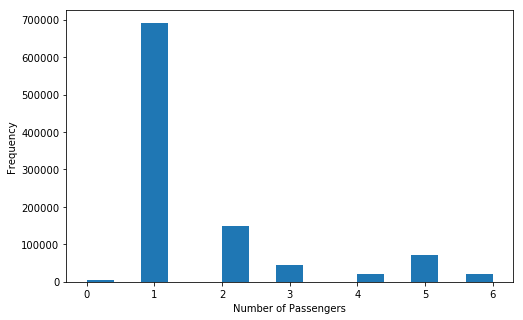

In [49]:
plt.figure(figsize= (8,5))
plt.hist(train['passenger_count'],bins = 15)
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')

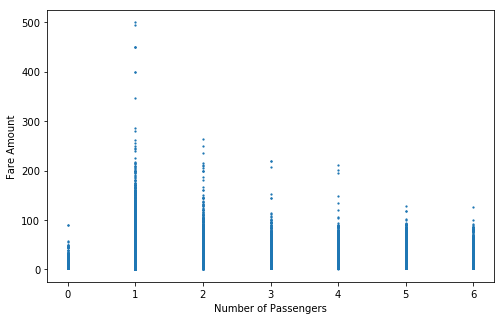

In [50]:
plt.figure(figsize = (8,5))
plt.scatter(x = train['passenger_count'], y = train['fare_amount'], s= 1.5)
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount')

- By seeing the above graphs we can see that single passengers are the frequnt tranvellers. Maximum fare is also generated from the single passenger.

- Now Let's see Does the date and time of pickup  affect the fare amount?

#### 2. Does the date and time of pickup affect the fare?

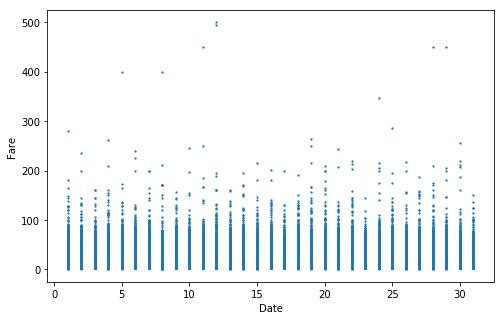

In [51]:
plt.figure(figsize = (8,5))
plt.scatter(x=train['date'],y = train['fare_amount'],s = 1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

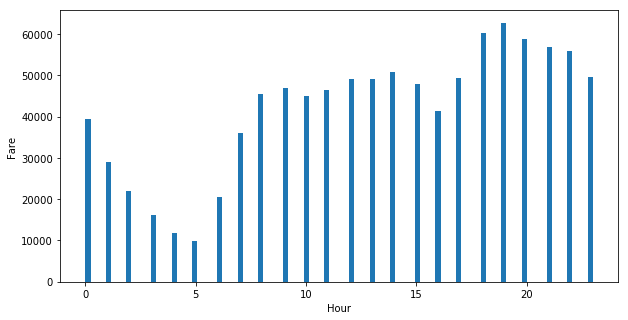

In [52]:
plt.figure(figsize = (10,5))
plt.hist(train['hour'], bins= 100)
plt.xlabel('Hour')
plt.ylabel('Fare')

- Interestingly we can see that the can booking is very low at 5AM and very high at 7PM.

- Does the day of the week affect the fare?

#### 3. Does the day of the week affect the fare?

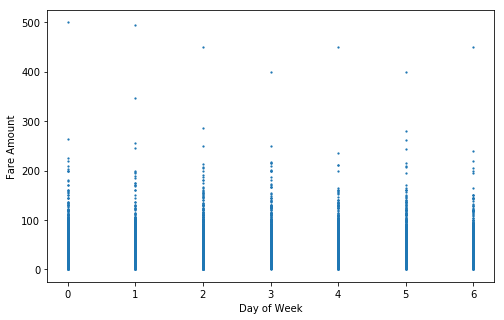

In [53]:
plt.figure(figsize = (8,5))
plt.scatter(x = train['day_of_month'], y= train['fare_amount'], s= 1.5)
plt.xlabel('Day of Week')
plt.ylabel('Fare Amount')

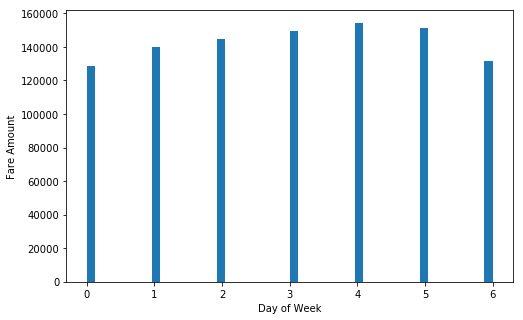

In [54]:
plt.figure(figsize = (8,5))
plt.hist(train['day_of_month'],bins= 50)
plt.xlabel('Day of Week')
plt.ylabel('Fare Amount')

- By seeing the plots for day of week we can clearly observe the highest fare is earned on Sunday and Monday.
- Also people travel Thursday more than any other day.

In [55]:
bins_0 = train.loc[(train['harvesine_distance'] == 0), ['harvesine_distance']]
bins_1 = train.loc[(train['harvesine_distance'] > 0) & (train['harvesine_distance'] <= 10),['harvesine_distance']]
bins_2 = train.loc[(train['harvesine_distance'] > 10) & (train['harvesine_distance'] <= 50),['harvesine_distance']]
bins_3 = train.loc[(train['harvesine_distance'] > 50) & (train['harvesine_distance'] <= 100),['harvesine_distance']]
bins_4 = train.loc[(train['harvesine_distance'] > 100) & (train['harvesine_distance'] <= 200),['harvesine_distance']]
bins_5 = train.loc[(train['harvesine_distance'] > 200) & (train['harvesine_distance'] <= 300),['harvesine_distance']]
bins_6 = train.loc[(train['harvesine_distance'] > 300),['harvesine_distance']]
bins_0['bins'] = '0'
bins_1['bins'] = '0-10'
bins_2['bins'] = '11-50'
bins_3['bins'] = '51-100'
bins_4['bins'] = '100-200'
bins_5['bins'] = '201-300'
bins_6['bins'] = '>300'
dist_bins =pd.concat([bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6])
#len(dist_bins)
dist_bins.columns

Index(['harvesine_distance', 'bins'], dtype='object')

In [56]:
dist_bins['bins'].value_counts()

0-10       920071
11-50       49073
0           28481
>300         1928
100-200       206
51-100        147
201-300         5
Name: bins, dtype: int64

- From the above count results we can clearly see there are 28481 records which has distance as zero.
- Also there are 1928 records where distance is more than 300KM. Since the number of records are high we will keep these outlier records which may have caused due to missing values in latitude and longitude.
    - Pickup latitude and pickup longitude are 0 but dropoff latitude and longitude are not 0, but the fare is 0.

In [57]:
#pickup latitude and longitude = 0
train.loc[((train['pickup_latitude'] == 0) & (train['pickup_longitude'] == 0)) & ((train['dropoff_latitude'] !=0) & (train['dropoff_longitude'] !=0)) & (train['fare_amount']== 0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,date,day_of_month,hour
897211,2015-04-08 00:47:30.000000100,0.0,2015-04-08 00:47:30,0.0,0.0,-73.937698,40.758118,1,8662.340373,2015,4,8,2,0


In [58]:
# drop records which has pickup latitude and longitude = 0 and fare =0
train.drop(train.loc[((train['pickup_latitude'] == 0) & (train['pickup_longitude'] == 0)) & ((train['dropoff_latitude'] !=0) & (train['dropoff_longitude'] !=0)) & (train['fare_amount']== 0)].index, axis = 0, inplace = True)

In [59]:
train.shape

(999910, 14)

In [60]:
#Check in test data
test.loc[((test['pickup_latitude']==0) & (test['pickup_longitude']==0))&((test['dropoff_latitude']!=0) & (test['dropoff_longitude']!=0))]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,date,day_of_month,hour


In [61]:
#dropoff latitude and longitude = 0
train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,date,day_of_month,hour
930680,2015-03-21 21:27:02.000000200,0.0,2015-03-21 21:27:02,-73.982101,40.770557,0.0,0.0,2,8666.270974,2015,3,21,5,21
942215,2015-03-22 00:36:37.000000900,0.0,2015-03-22 00:36:37,-73.952240,40.749435,0.0,0.0,1,8663.365938,2015,3,22,6,0
949564,2015-04-28 11:18:39.000000400,0.0,2015-04-28 11:18:39,-73.996246,40.748653,0.0,0.0,1,8666.993460,2015,4,28,1,11


In [62]:
#dropoff latitude and longitude = 0
train.drop(train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)].index, axis=0, inplace = True)

In [63]:
train.shape

(999907, 14)

In [64]:
#Checking test data
#Again no records! AWESOME!
test.loc[((test['pickup_latitude']!=0) & (test['pickup_longitude']!=0))&((test['dropoff_latitude']==0) & (test['dropoff_longitude']==0))]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,date,day_of_month,hour


- Let's check the harvesine_distance fields which are greater than 200 kms cause there is no way that people would travel more than 200 kms at the most in NYC in a CAB!

In [65]:
high_distance = 0

In [66]:
high_distance = train.loc[(train['harvesine_distance']>200)&(train['fare_amount']!=0)]

In [67]:
high_distance.shape

(1929, 14)

In [68]:
high_distance['harvesine_distance'] = high_distance.apply(
    lambda row: ( row['fare_amount'] - 2.50) / 1.56, axis = 1

)

C:\Users\sandeepkumar8\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [69]:
high_distance

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,date,day_of_month,hour
472,2009-02-22 22:48:00.000000130,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,0.000000,2009,2,22,6,22
1260,2011-03-10 20:25:00.000000490,5.70,2011-03-10 20:25:00,-73.973907,40.754743,0.000000,0.000000,2,2.051282,2011,3,10,3,20
2280,2011-08-29 08:24:00.000000107,8.90,2011-08-29 08:24:00,-73.936667,40.757815,0.000000,40.757815,1,4.102564,2011,8,29,0,8
2397,2012-06-24 17:11:10.000000100,45.00,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2,27.243590,2012,6,24,6,17
4278,2015-04-07 23:33:02.000000500,7.00,2015-04-07 23:33:02,-73.972702,40.757423,0.000000,0.000000,1,2.884615,2015,4,7,1,23
4597,2010-03-30 07:12:00.000000158,6.90,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1,2.820513,2010,3,30,1,7
5864,2012-03-04 01:35:00.000000173,8.50,2012-03-04 01:35:00,-73.995030,40.744945,-7.986640,40.729937,1,3.846154,2012,3,4,6,1
6188,2014-07-28 15:04:00.000000280,15.50,2014-07-28 15:04:00,0.000000,0.000000,-73.952980,40.786670,5,8.333333,2014,7,28,0,15
6302,2015-02-27 16:18:58.000000400,16.50,2015-02-27 16:18:58,0.000000,0.000000,-73.936600,40.796543,1,8.974359,2015,2,27,4,16
7014,2011-06-18 04:03:00.000000830,4.50,2011-06-18 04:03:00,-73.988980,40.721697,-74.001073,0.728087,3,1.282051,2011,6,18,5,4


In [70]:
high_distance[high_distance['harvesine_distance'] == 0].count()

key                   186
fare_amount           186
pickup_datetime       186
pickup_longitude      186
pickup_latitude       186
dropoff_longitude     186
dropoff_latitude      186
passenger_count       186
harvesine_distance    186
year                  186
month                 186
date                  186
day_of_month          186
hour                  186
dtype: int64

In [71]:
high_distance.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,date,day_of_month,hour
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,0.000000,2009,2,22,6,22
1260,2011-03-10 20:25:00.000000490,5.7,2011-03-10 20:25:00,-73.973907,40.754743,0.000000,0.000000,2,2.051282,2011,3,10,3,20
2280,2011-08-29 08:24:00.000000107,8.9,2011-08-29 08:24:00,-73.936667,40.757815,0.000000,40.757815,1,4.102564,2011,8,29,0,8
2397,2012-06-24 17:11:10.000000100,45.0,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2,27.243590,2012,6,24,6,17
4278,2015-04-07 23:33:02.000000500,7.0,2015-04-07 23:33:02,-73.972702,40.757423,0.000000,0.000000,1,2.884615,2015,4,7,1,23


In [72]:
train.update(high_distance)

In [73]:
train[train['harvesine_distance'] ==0].count()

key                   28667
fare_amount           28667
pickup_datetime       28667
pickup_longitude      28667
pickup_latitude       28667
dropoff_longitude     28667
dropoff_latitude      28667
passenger_count       28667
harvesine_distance    28667
year                  28667
month                 28667
date                  28667
day_of_month          28667
hour                  28667
dtype: int64

#### MODELLING AND PREDICTION

- FINALLY !! It's time for precdiction. We will assign the x and y values for prediction.
- Now we are done with the EDA and will work on the Modeling and Prediction part on this dataset.

In [74]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'harvesine_distance', 'year', 'month', 'date',
       'day_of_month', 'hour'],
      dtype='object')

In [75]:
test.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'harvesine_distance', 'year', 'month', 'date', 'day_of_month', 'hour'],
      dtype='object')

In [76]:
#lets not consider the pickup_datetime
train = train.drop('pickup_datetime',axis = 1)
test = test.drop('pickup_datetime',axis =1)

train = train.drop('key', axis =1)
test = test.drop('key', axis = 1)

In [77]:
y_train = train['fare_amount']
#y_test = test['fare_amount']
X_train = train.drop('fare_amount',axis =1)
X_test = test

In [78]:
X_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,date,day_of_month,hour
0,-73.973320,40.763805,-73.981430,40.743835,1,2.323260,2015,1,27,1,13
1,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,2015,1,27,1,13
2,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,2011,10,8,5,11
3,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,2012,12,1,5,21
4,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,2012,12,1,5,21


### Linear Regression Model

Let's use the Linear regression model for our prediction. We will use this model and then meaured its error using Mean Squared Error.

In [79]:
#lets learn using Linear Model

from sklearn import linear_model
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
slr = linear_model.LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [80]:
#now our model is trained
#we will find the accuracy for this model using Root Mean Square error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


y_train_err = mean_squared_error(y_train, y_train_pred)

print('Mean Sqaured Error for Training data is : ',(y_train_err))

Mean Sqaured Error for Training data is :  42.558473678865994


### Random Forest Regressor Model

- Now from the above error measurement result we can see this model has very high error rate. This implies this model does not best fir this problem. We will now use the Random Forest Regressor model and find the error value.
- Below test results shows the Random Forest model is way better than Linear model with less error value.

In [81]:
#let's train our model using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

C:\Users\sandeepkumar8\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [82]:
y_train_err = mean_squared_error(y_train, y_train_pred)

print('Mean Sqaured Error for Training data is : ',(y_train_err))

Mean Sqaured Error for Training data is :  3.8708877052238466
